In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### `plt.axes`：手动创建多子图

创建坐标轴的最基本方法就是使用`plt.axes`函数。  如果不传入参数的话，默认是创建一个**标准**坐标。  
`plt.axes()`可以传入一个参数，由图形的坐标系统的四个值构成。分别为
[left,bottom,  width, height]取值范围为0(左下角，原点)，1(右上角)


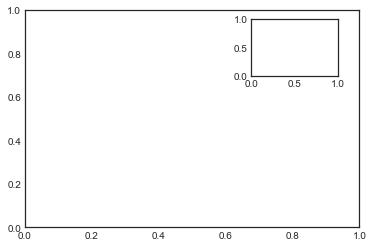

In [14]:
# 图中图的坐标
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

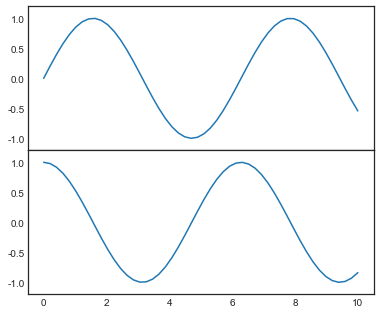

In [26]:
# 竖直排列的坐标轴
fig = plt.figure()
ax1 = fig.add_axes([0.2, 0.5, 0.8, 0.5], xticklabels=[], ylim=[-1.2, 1.2])
ax2 = fig.add_axes([0.2, 0, 0.8, 0.5], ylim=[-1.2, 1.2])

x = np.linspace(0, 10)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

### `plt.subplot`:简易网格子图
`plt.subplot(row, col, idx)`

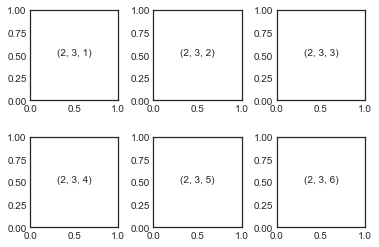

In [28]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
            fontsize=10, ha='center')

# 调整子图间的间隔
plt.subplots_adjust(hspace=0.4, wspace=0.4)

### 带边距调整功能的`plt.subplot()`

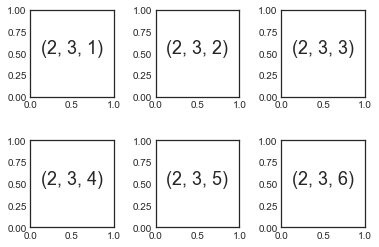

In [33]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')

### `plt.subplots`:一行代码创建子图网络
返回一个`Figure`对象和`axes`对象ndarray。 

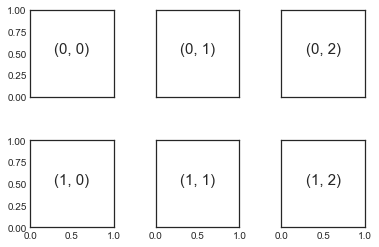

In [49]:
fig, ax = plt.subplots(2,3, sharex='col',sharey='row')
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5, 0.5, str((i, j)), fontsize=15, ha='center')

### `plt.GridSpec`:实现更复杂的排列
实现不规则的多行多列子图  
`plt.GridSpec()` 是最好的工
具。 `plt.GridSpec()` 对象本身不能直接创建一个图形， 它只是
`plt.subplot()` 命令可以识别的简易接口。 

In [58]:
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
grid

GridSpec(2, 4)

可以通过类似 Python 切片的语法设置子图的位置和扩展尺寸

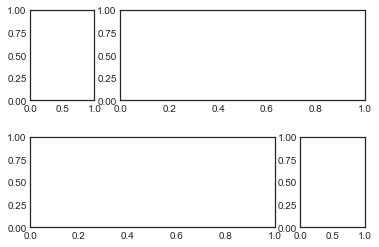

In [62]:
plt.subplot(grid[0,0])  # 第一行，第一个子图
plt.subplot(grid[0, 1:])  # 第一行，剩下的全部子图合并
plt.subplot(grid[1,:3])  # 第二行，前3个子图合并
plt.subplot(grid[1, 3])  # 第二行，第四个子图

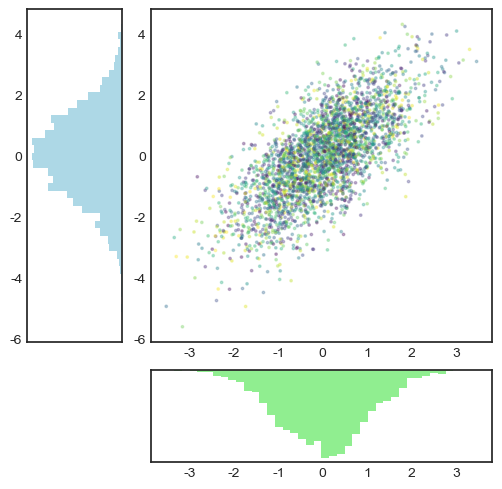

In [97]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴和网络配置格式
fig = plt.figure(figsize=(6,6), dpi=100)
grid = plt.GridSpec(4,4,hspace=0.3, wspace=0.3)
main_ax = plt.subplot(grid[:-1, 1:])
y_hist = plt.subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = plt.subplot(grid[-1,1: ], yticklabels=[], sharex=main_ax)

# 主坐标轴画散点图
# main_ax.plot(x, y, 'ok', markersize=3, alpha=0.3)
main_ax.scatter(x, y, c=np.random.random(3000), cmap='viridis',s=3, alpha=0.3)
# 次坐标轴画频率直方图
x_hist.hist(x, bins=40, histtype='stepfilled', orientation='vertical',color='lightgreen')
x_hist.invert_yaxis()

y_hist.hist(y, bins=40, histtype='stepfilled', orientation='horizontal', color='lightblue')
y_hist.invert_xaxis()
plt.show()